In [1]:
import pandas as pd 
import ast 
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt
dataset = load_dataset ('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)


In [2]:
df_US = df[df['job_country'] == 'United States'].copy()

In [3]:
# df_skills = df_US.explode('job_skills')
# df_skills[['job_title','job_skills']]

df_skills = df_US.explode('job_skills')
df_skills[['job_title','job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


In [20]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_count.head(5)



,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022


In [34]:
df_skills_count[df_skills_count['job_title_short'] == 'Data Analyst'].head(5)

,job_skills,job_title_short,skill_count
1521,sql,Data Analyst,34452
455,excel,Data Analyst,27519
1611,tableau,Data Analyst,19311
1207,python,Data Analyst,18382
1349,sas,Data Analyst,13200


In [43]:

job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles  = sorted(job_titles[:3])
job_titles


['Data Analyst', 'Data Engineer', 'Data Scientist']

In [70]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [71]:
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [72]:
df_skills_perc = pd.merge(df_skills_count,df_job_title_count,how='left', on='job_title_short')
df_skills_perc['skill_perc']= df_skills_perc['skill_count']/df_skills_perc['jobs_total']*100
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_perc
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


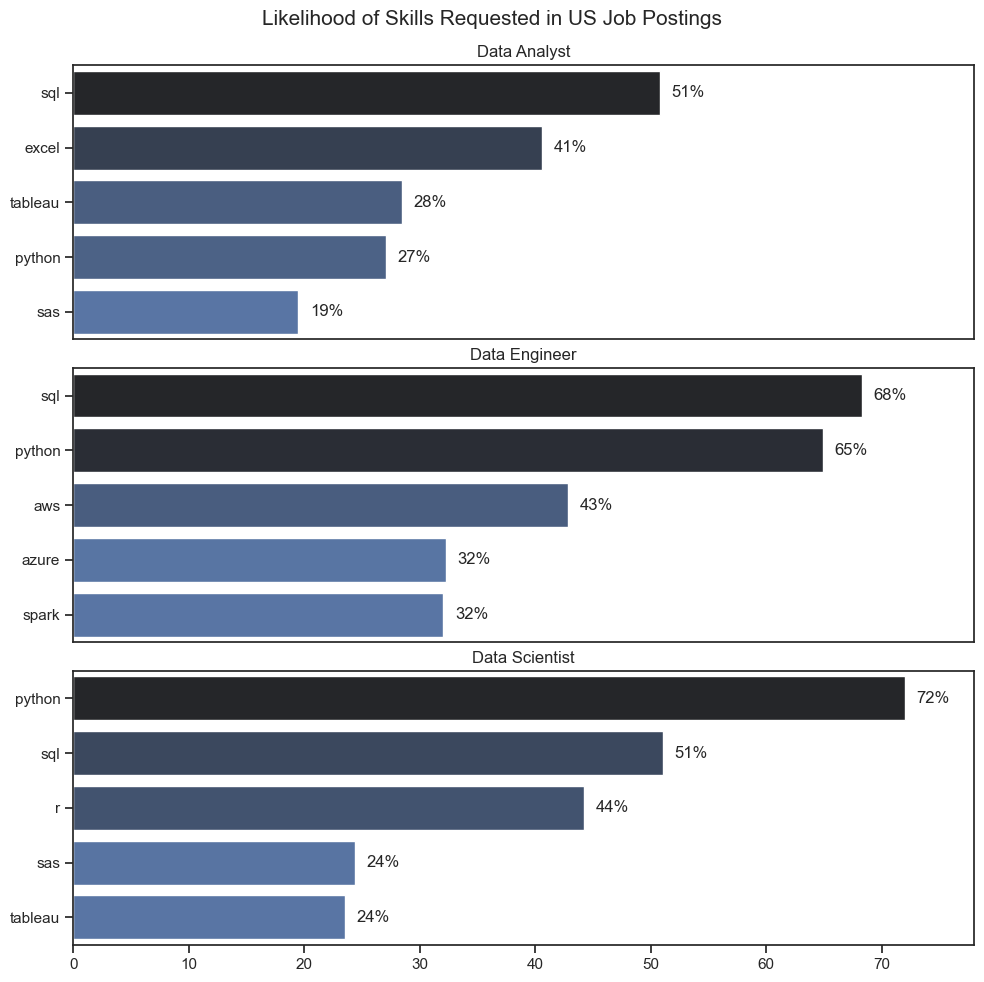

In [86]:
fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style="ticks")
for i,job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot[df_plot['job_title_short'] == job_title].head(5), x='skill_perc', y='job_skills', ax=ax[i], hue= 'skill_perc',palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')  
    ax[i].set_xlim(0,78)
    ax[i].legend().set_visible(False)  

    for n, v in enumerate(df_plot['skill_perc']):
        ax[i].text(v+1 ,n,f'{v:.0f}%', va='center', )
    if i != len(job_titles)-1: 
        ax[i].set_xticks([])
fig.set_size_inches(10, 10)
fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
plt.tight_layout(h_pad=0.5)  
plt.show()
